<h1>Quiz 1 : Pemahaman</h1>

1. Sebutkan apa saja kira2 preprocessing Data?
2. Jelaskan beberapa cara imputing missing value?
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

1. a. standard and normalization
   b. impute missing value 
   c. inconsistent value
   d. duplicate value
   e. aggregating data
   f. pengurangan dimensi
   g. encoding fitur

2. a. drop missing value
   b. fill with median/mean
   c. fill with modus
   d. fill with bfill, ffill
   e. knn
   
3. centeriong dan scaling berupa nromalization dan standarization//
   normalisasi dilakukan ketika kita tidak mengetahui dan mengasumsikan data sebagai distribusi normal dan menggunakan 
    ML yang tidak megasumsikan datanya sebagai dist normal//
    standardisasi dilakukan ketika kita tahu bahwa data yang digunakan merupakan distirbusi normal sehingga kita dapat 
    menggunakan macam macam tipe regresi
    
4. -mining data from data source untuk mengambil data dari berbagai sumber//
   -processing data dengan EDA (exploratory data analysis) dan feature engineering//
   -modelling data with machine learning//
   -deploy model untuk memprediksi data baru//
   -monitor model sehingga selalu memberikan performa yang baik//

<h1>Quiz 2 : Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data titanic.csv sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data titanic_test.csv untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

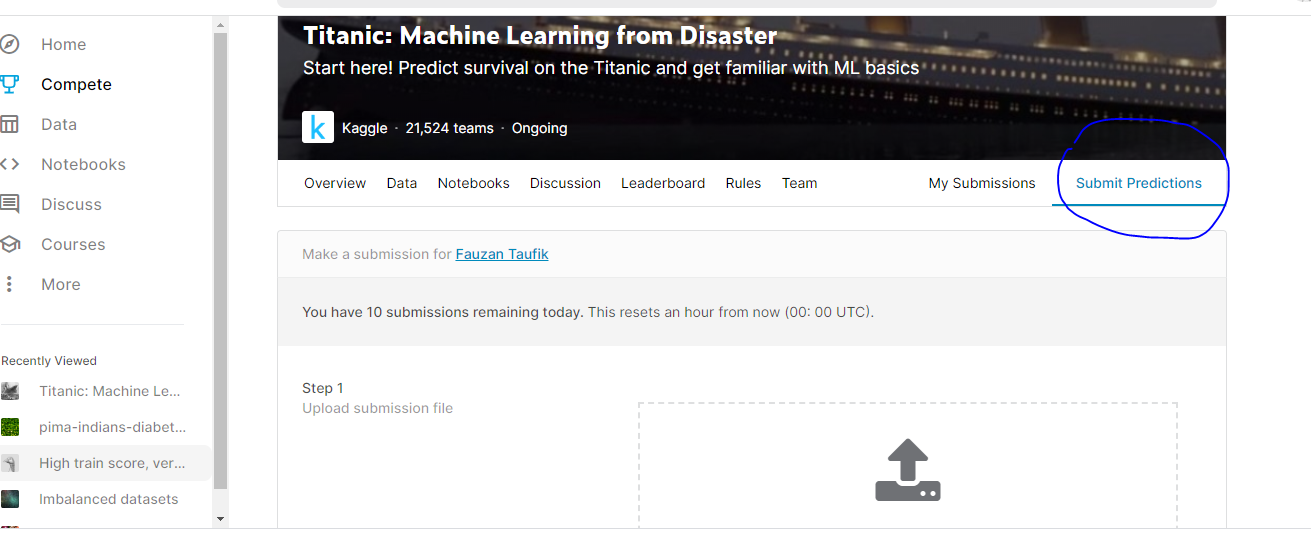

In [234]:
import pandas as pd

df=pd.read_csv('titanic.csv',header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [237]:
import numpy as np
df.loc[df['Cabin'].isnull()].shape #terlalu banyak data hilang di kolom kabin sehingga kolom dapat dihilangkan

(687, 12)

In [238]:
df.shape

(891, 12)

In [239]:
df=df.drop(columns=['Cabin','PassengerId','Ticket','Name'])

In [240]:
df.loc[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [241]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [242]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [244]:
df.loc[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [245]:
df['Embarked'].mode()[0] #karena modus S maka data hilang akan diganti S

'S'

In [246]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [248]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [249]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [250]:
df=pd.get_dummies(df,columns=['Sex','Embarked'])

In [251]:
df.loc[df['Parch']]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.250,0,1,0,0,1
0,0,3,22.0,1,0,7.250,0,1,0,0,1
0,0,3,22.0,1,0,7.250,0,1,0,0,1
0,0,3,22.0,1,0,7.250,0,1,0,0,1
0,0,3,22.0,1,0,7.250,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
0,0,3,22.0,1,0,7.250,0,1,0,0,1
0,0,3,22.0,1,0,7.250,0,1,0,0,1
2,1,3,26.0,0,0,7.925,1,0,0,0,1
0,0,3,22.0,1,0,7.250,0,1,0,0,1


In [252]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [253]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()
X=df.drop(columns='Survived')
y=df['Survived']
param_knn={'n_neighbors':np.arange(2,100),
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidean']}
gscv=GridSearchCV(knn,
                  param_grid=param_knn,
                  scoring='accuracy',
                  cv=5, verbose=1,
                  return_train_score=True )
gscv.fit(X,y)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1960 out of 1960 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': 

In [254]:
gscv.best_score_

0.7318372983491306

In [255]:
gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'distance'}

In [256]:
df2=pd.read_csv('titanic_test.csv')

In [257]:
df2=df2.drop(columns=['Name','Ticket','Cabin'])

In [258]:
df2['Age']=df2['Age'].fillna(df2['Age'].mean())

In [259]:
df2['Fare']=df2['Fare'].fillna(df2['Fare'].mean())

In [260]:
df2=pd.get_dummies(df2,columns=['Sex','Embarked'])

In [261]:
#cleaning test data

X_test=df2.drop(columns='PassengerId')

In [262]:
y_pred=gscv.predict(X_test)

In [263]:
df_predict=pd.DataFrame(y_pred)

In [264]:
df3=pd.read_csv('titanic_test.csv')

In [265]:
dataframes=[df3,df_predict]
survive_predict=pd.concat(dataframes,axis=1)
#survive_predict=survive_predict.rename({0:'Survive_probs'})
survive_predict.columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin',
                         'Embarked','Survived']
survive_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


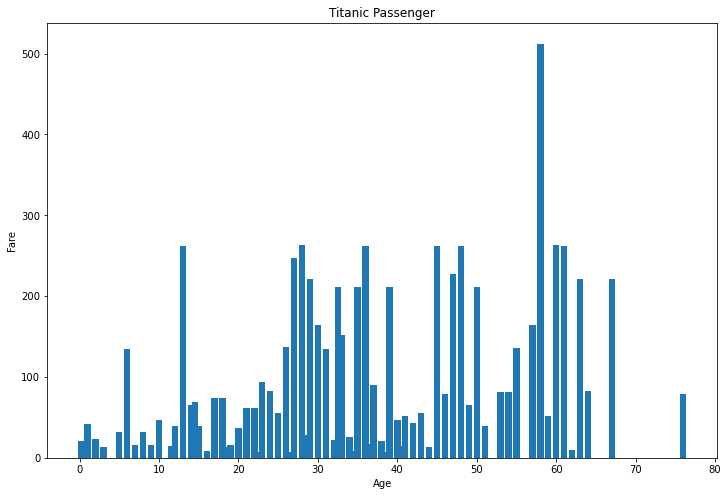

In [266]:
import matplotlib.pyplot as plt
X_plt=survive_predict['Age']
y_plt=survive_predict['Fare']
fig,ax=plt.subplots(figsize=(12,8))
ax.bar(X_plt,y_plt)
ax.set_title('Titanic Passenger')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

In [267]:
#survive_predict['Fare']=survive_predict['Fare'].replace(to_replace={'Fare':{512.3292:np.nan}},inplace=True)
survive_predict['Fare'].mask((survive_predict['Fare'] > 300), inplace=True)

In [268]:
#survive_predict['Fare'].replace(to_replace=[None], value=np.nan, inplace=True)

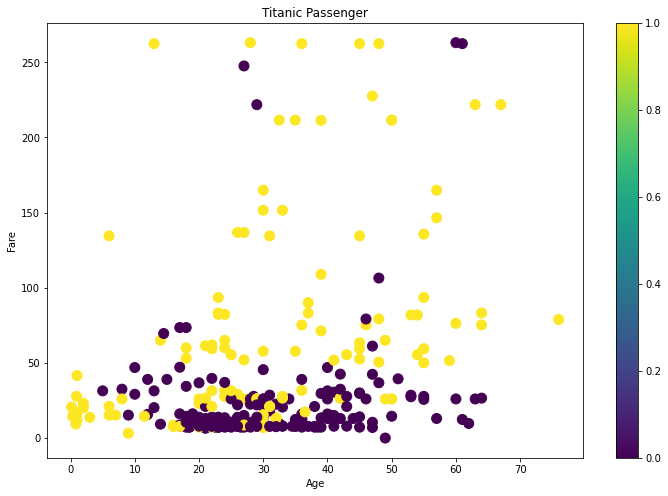

In [269]:
X_plt=survive_predict['Age']
y_plt=survive_predict['Fare']
fig,ax=plt.subplots(figsize=(12,8))
sctr=ax.scatter(X_plt,y_plt,c=survive_predict['Survived'],s=100)
ax.set_title('Titanic Passenger')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
fig.colorbar(sctr)
fig.set_label('your label here')
plt.show()

In [270]:
survive_predict.loc[survive_predict['Survived']==1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,1
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1


In [271]:
survive_predict.loc[survive_predict['Survived']==0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [272]:
df_fix=survive_predict[['PassengerId','Survived']]

In [273]:
df_fix.to_csv('KaggleTitanic.csv',index=False)

##### 